In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
from scipy.fftpack import fft
%matplotlib inline

In [2]:
# OU
Tot=300
dt=0.01
T=np.arange(dt,Tot,dt)
tau=1
D = 4
L=np.zeros(len(T))
mu, sigma = 0, 1
for i in range(len(T)-1):
    L[i+1]=L[i]*(1-dt/tau)+math.sqrt(D*dt)*np.random.normal(mu,sigma)

In [3]:
# filtering
fc=[4,2,1,0.5]
x_set=[L]
for ifc in range(len(fc)):
    b, a = signal.butter(2, 2*fc[ifc]*dt, btype='low', analog=False)
    Lf = signal.filtfilt(b, a, L)
    x_set.append(Lf)

(150, 160)

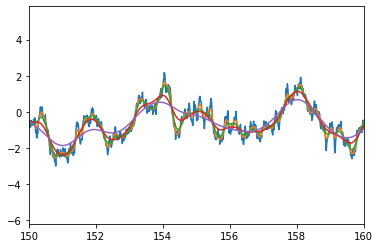

In [4]:
for i in range(np.size(x_set,0)):
    plt.plot(T,x_set[i])
plt.xlim(150,160)

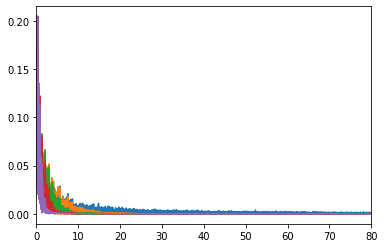

In [5]:
#FFT
for nset in range(np.size(x_set,0)):
    Ts=dt
    xft=fft(x_set[nset])
    xftreal = xft.real  
    xftimg = xft.imag
    xft_abs=abs(xft)
    xft_nor=xft_abs/len(xft_abs)
    xft_nor2=xft_nor[range(int(len(xft_nor)/2))]
    
    f = np.arange(len(xft))
    f2 = f[range(int(len(xft)/2))]
    f2=f2*Ts
    plt.plot(f2,xft_nor2)
    plt.xlim(0,80)

In [6]:
y_set=[]
z_set=[]
for i in range(np.size(x_set,0)):
    x=x_set[i]
#     alpha = 60.
#     beta =  2
#     K = 30.
#     g = 30.
    alpha = 19.9
    beta =  0.62
    K = 10
    g = 30
    y=np.zeros(len(T))
    z=np.zeros(len(T))
    for j in range(len(T)-1):
        dy=dt*(-alpha*y[j]+K*(x[j]-z[j]))
        dz=dt*(-beta*z[j]+g*y[j])
        y[j+1]=y[j]+dy
        z[j+1]=z[j]+dz
    y_set.append(y)
    z_set.append(z)

In [7]:
# same scale
for i in range(np.size(x_set,0)):
    x_set[i]=x_set[i]/np.std(x_set[i])
    y_set[i]=y_set[i]/np.std(y_set[i])
    z_set[i]=z_set[i]/np.std(z_set[i])

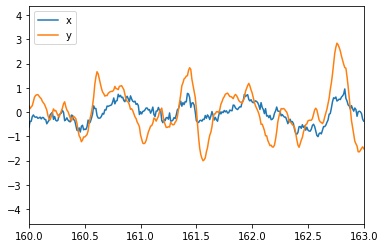

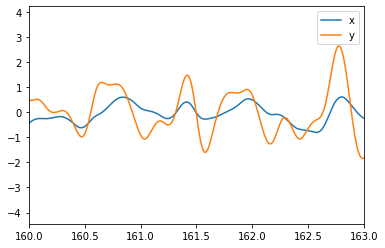

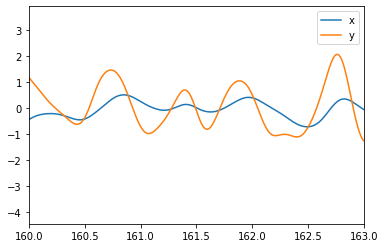

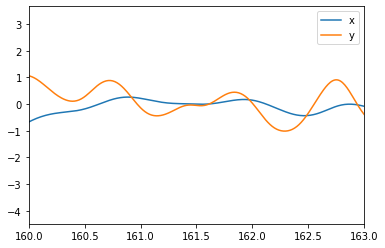

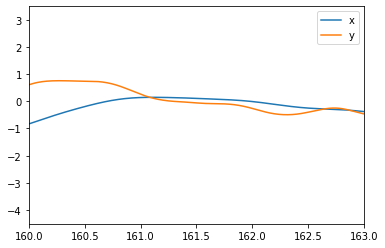

In [8]:
for i in range(np.size(x_set,0)):
    plt.plot(T,x_set[i])
    plt.plot(T,y_set[i])
#     plt.plot(T,z_set[i])
    plt.xlim(160,163)
    plt.legend(('x','y'))
    plt.show()

In [9]:
# assign data to different state
# state number should be even
nx=8
ny=6

xstate_set=[]
ystate_set=[]
for nset in range(np.size(x_set,0)):
# states of input
    xs=x_set[nset]
    xs=np.sort(xs)
    xstatestep=len(xs)/nx
    xinterval=[0]
    for i in range(int(nx/2-1)):
        xinterval=np.append(xinterval,xs[round(len(xs)/2)+(i+1)*round(xstatestep)])
    xinterval=np.append(xinterval,float('inf'))
    for j in range(int(nx/2-1)):
        xinterval=np.append(xs[round(len(xs)/2)-(j+1)*round(xstatestep)],xinterval)
    xinterval=np.append(float('-inf'),xinterval)
    print(xinterval)
    xstate=np.zeros(len(x_set[nset]))
    for i in range(len(x_set[nset])):
        tempinterval=[]
        state=[]
        tempinterval=np.array(xinterval)
        tempinterval=np.append(tempinterval,x_set[nset][i])
        tempinterval=np.sort(tempinterval)
        state=np.where(tempinterval==x_set[nset][i])
        xstate[i]=state[0][0]
    xstate = xstate.astype(int)

    # states of output
    ys=np.sort(y_set[nset])
    ystatestep=len(ys)/ny
    yinterval=[0]
    for i in range(int(ny/2-1)):
        yinterval=np.append(yinterval,ys[round(len(ys)/2)+(i+1)*round(ystatestep)])
    yinterval=np.append(yinterval,float('inf'))
    for j in range(int(ny/2-1)):
        yinterval=np.append(ys[round(len(ys)/2)-(j+1)*round(ystatestep)],yinterval)
    yinterval=np.append(float('-inf'),yinterval)
    print(yinterval)
    ystate=np.zeros(len(y_set[nset]))
    for i in range(len(y_set[nset])):
        tempinterval=[]
        state=[]
        tempinterval=np.array(yinterval)
        tempinterval=np.append(tempinterval,y_set[nset][i])
        tempinterval=np.sort(tempinterval)
        state=np.where(tempinterval==y_set[nset][i])
        ystate[i]=state[0][0]
    ystate = ystate.astype(int)
    
    xstate_set.append(xstate)
    ystate_set.append(ystate)

    


[       -inf -1.29147988 -0.80148175 -0.44912384  0.          0.1580181
  0.50990002  0.99201791         inf]
[       -inf -0.99217605 -0.45079999  0.          0.40363213  0.96064492
         inf]
[       -inf -1.30417882 -0.7980174  -0.44574829  0.          0.14816899
  0.50615688  0.97443471         inf]
[       -inf -0.99550959 -0.45229596  0.          0.40122932  0.96512127
         inf]
[       -inf -1.30260504 -0.8004976  -0.44712463  0.          0.14300644
  0.50550682  0.96861572         inf]
[       -inf -1.00102666 -0.45779199  0.          0.3777136   0.93399119
         inf]
[       -inf -1.30169263 -0.7885697  -0.45147652  0.          0.11621955
  0.46980224  0.980523           inf]
[       -inf -1.00589485 -0.51238856  0.          0.35379947  0.94265605
         inf]
[       -inf -1.29823393 -0.76745174 -0.48274992  0.          0.08320922
  0.47280841  0.97074512         inf]
[       -inf -0.99038048 -0.50316334  0.          0.30809852  0.84719541
         inf]


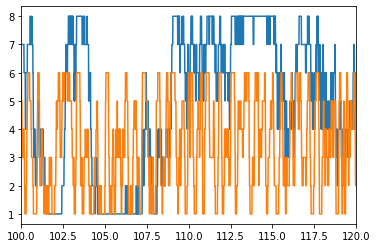

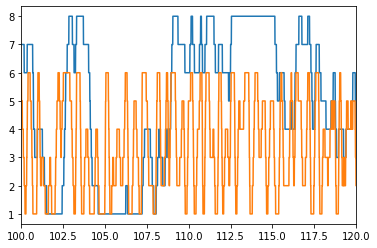

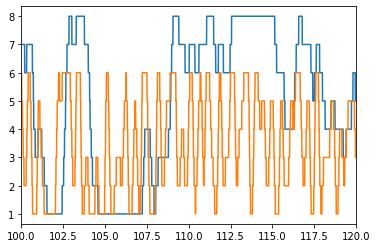

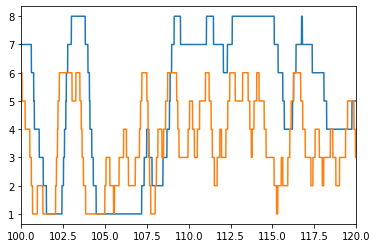

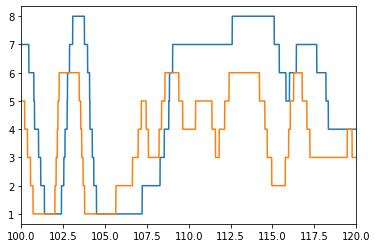

In [10]:
for i in range(np.size(x_set,0)):
    plt.plot(T,xstate_set[i])
    plt.plot(T,ystate_set[i])
    plt.xlim(100,120)
    plt.show()

In [11]:
# MI calculation
MI_set=[]
for k in range(np.size(x_set,0)):
    xstate=x_set[k]
    ystate=y_set[k]
    
    negshift=-1 # second
    posshift=1 # second
    shiftdu=dt # second
    shiftlen=(posshift-negshift)/dt+1
    timeshift=np.linspace(negshift,posshift,int(shiftlen))
    bitshift=np.linspace(negshift/dt,posshift/dt,int(shiftlen))
    xedges=[]
    yedges=[]
    xs=np.sort(xstate)
    ys=np.sort(ystate)
    for ii in range(nx):
        ind=int((ii)*len(xstate)/nx)
        xedges.append(xs[ind])
    for ii in range(ny):
        ind=int((ii)*len(xstate)/ny)
        yedges.append(ys[ind])
    xedges.append(xs[-1])
    yedges.append(ys[-1])

    # shifted data
    # shift>0 => y shifted to positive side
    MI=np.zeros(len(bitshift))
    for i in range(len(bitshift)):
        xx=[]
        yy=[]
        shift=int(bitshift[i])
        if shift>0:
            xx=xstate[shift:]
            yy=ystate[:-shift]
        elif shift==0:
            xx=xstate
            yy=ystate
        elif shift<0:
            xx=xstate[:shift]
            yy=ystate[-shift:]

        H, xedges, yedges = np.histogram2d(xx, yy, bins=(xedges, yedges))
        statesum=np.sum(H)
        px_list=np.sum(H,axis=1)/statesum
        py_list=np.sum(H,axis=0)/statesum
        pxy_list=H/statesum
        MIsingle=pxy_list*np.log2(pxy_list/px_list.reshape(-1,1)/py_list)
#         px=px_list[xstate_set[k]-int(1)]
#         py=py_list[ystate_set[k]-int(1)]
#         pxy=np.zeros(len(xstate_set[k]))
#         xindices=xstate_set[k]-int(1)
#         yindices=ystate_set[k]-int(1)
#         for ixiy in range(len(xstate_set[k])):
#             pxy[ixiy]=pxy_list[xindices[ixiy]][yindices[ixiy]]
#        MIsingle=pxy*np.log2(pxy/px/py)
        
        MI[i]=np.nansum(MIsingle)


        
    MI_set.append(MI)
    

C:\Users\llinc\anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log2
C:\Users\llinc\anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in multiply


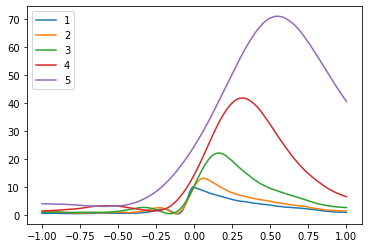

In [12]:
for i in range(np.size(x_set,0)):
    plt.plot(timeshift,MI_set[i]/dt)
    #plt.xlim()
plt.legend(('1','2','3','4','5'))

In [14]:
## PIfunc that calculate Unique, Synergy and Redundancy of three unsymmetric varibles
def PIfunc(r, x, v, dt, window):
    negshift=window[0] # second
    posshift=window[1] # second
    shiftlen=(posshift-negshift)/dt+1
    timeshift=np.linspace(negshift,posshift,int(shiftlen))
    bitshift=np.linspace(negshift/dt,posshift/dt,int(shiftlen),dtype = 'int16')
    Redun =np.zeros(len(bitshift))
    MIxr=np.zeros(len(bitshift))
    MIvr=np.zeros(len(bitshift))
    MIxvR=np.zeros(len(bitshift))
    # shifted data
    # shift>0 => y shifted to positive side
    for i in range(len(bitshift)):
        xx=[]
        vv=[]
        rr=[]
        shift=bitshift[i]
        if shift>0:
            xx=x[shift:]
            vv=v[shift:]
            rr=r[:(-1*shift)]
        elif shift==0:
            xx=x
            vv=v
            rr=r
        elif shift<0:
            xx=x[:shift]
            vv=v[:shift]
            rr=r[(-1*shift):]
        #find weight of each states by 3D histogram 
        xedges = np.append(np.unique(xx),(max(xx)+1))
        vedges = np.append(np.unique(vv),(max(vv)+1))
        redges = np.append(np.unique(rr),(max(rr)+1))
        dat = np.concatenate((xx[:,np.newaxis], vv[:,np.newaxis],rr[:,np.newaxis]), axis=1)
        N, edges = np.histogramdd(dat, bins=(xedges, vedges, redges))
        #Calculate all kinds of probability and make sure the shape of them
        px=(np.sum(N,axis=(1,2))/np.sum(N))[:, np.newaxis, np.newaxis]
        pv=(np.sum(N,axis=(0,2))/np.sum(N))[np.newaxis, :, np.newaxis]
        pr=(np.sum(N,axis=(0,1))/np.sum(N))[np.newaxis ,np.newaxis, :]
        pxv=(np.sum(N,axis=2)/np.sum(N))[:, :, np.newaxis]
        pxr=(np.sum(N,axis=1)/np.sum(N))[:, np.newaxis, :]
        pvr=(np.sum(N,axis=0)/np.sum(N))[np.newaxis, :, :]
        pxvr=(N/np.sum(N))
        
        MIxr[i]=np.nansum(pxr*np.log2(pxr/px/pr))/dt
        MIvr[i]=np.nansum(pvr*np.log2(pvr/pv/pr))/dt
        MIxvR[i]=np.nansum(pxvr*np.log2(pxvr/pxv/pr))/dt
        
        PI_xR = np.nansum(pxr*np.log2(pxr/px/pr), axis = (0,1))
        PI_vR = np.nansum(pvr*np.log2(pvr/pv/pr), axis = (0,1))
        Redun[i] = sum(np.minimum(PI_xR, PI_vR))/dt
    return timeshift, MIxr, MIvr, MIxvR, Redun

C:\Users\llinc\anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log2
C:\Users\llinc\anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in multiply
C:\Users\llinc\anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log2
C:\Users\llinc\anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in multiply
C:\Users\llinc\anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log2
C:\Users\llinc\anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in multiply
C:\Users\llinc\anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log2
C:\Users\llinc\anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply
C:\Users\llinc\anaconda3\lib

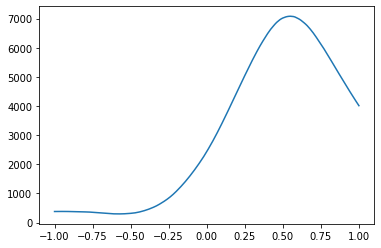

In [15]:
window =[-1,1]
k=np.size(x_set,0)-1
timeshift, MI, MIv, MIjoint, Redun = PIfunc(ystate_set[i], xstate_set[i], ystate_set[i], dt, window)
plt.plot(timeshift,MI/dt)